# Tweet Analysis
## Author : George M Cherian

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
import re
from tabulate import tabulate

### Reading the text file containing the tweets

In [2]:
with open('tweets.txt','r') as f:
    twt = f.readlines()
f.close()

### Converting all words in the tweet to lower case 

In [3]:
low_twt = list()
for tweet in twt:
    low_twt.append(tweet.lower())

In [4]:
low_twt #tweets converted to lower case 

["polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yelvcefxkc via @mashable\n",
 "it's not like we lack evidence of anthropogenic global warming\n",
 'rt @rawstory: researchers say we have three years to act on climate change before it’s too late https://t.co/wdt0kdur2f https://t.co/z0anpt…\n',
 '#todayinmaker# wired : 2016 was a pivotal year in the war on climate change https://t.co/44wotxtlcd\n',
 "rt @soynoviodetodas: it's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #electionnight\n",
 "worth a read whether you do or don't believe in climate change https://t.co/gglzvnyjun https://t.co/7afe2mah8j\n",
 'rt @thenation: mike pence doesn’t believe in global warming or that smoking causes lung cancer. https://t.co/gvwyaauu8r\n',
 'rt @makeandmendlife: six big things we can all do today to fight climate change, or how to be a climate activistã¢â‚¬â¦ https://t.co/tymlu6dbnm hã¢â‚¬â¦\n',


In [5]:
import nltk
from nltk.corpus import stopwords

#nltk.download('stopwords')
    

In [6]:
stop_words = set(stopwords.words('english'))

In [7]:
#These words will be removed from the tweet at a later stage 
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [8]:
# This function will remove links and hashtags(just the '#' symbol)
def tweet_clean(tweet):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet).split())

In [9]:
# clean_twt contains a version of the tweet with usernames,links,# and rt's removed
clean_twt = list()

for tweet in low_twt:
    temp = tweet.replace('rt','') #removes 'rt' from a tweet
    temp = re.sub('@[\w]+','',temp) #removes usernames
    clean_twt.append(tweet_clean(temp))

In [10]:
clean_twt

['polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what via',
 'its not like we lack evidence of anthropogenic global warming',
 'researchers say we have three years to act on climate change before its too late',
 'todayinmaker wired 2016 was a pivotal year in the war on climate change',
 'its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight',
 'woh a read whether you do or dont believe in climate change',
 'mike pence doesnt believe in global warming or that smoking causes lung cancer',
 'six big things we can all do today to fight climate change or how to be a climate activist h',
 'my 8yo nephew is inconsolable he wants to die of old age like me but will perish in the fiery hellscape of climate change',
 'no offense but like how do you just not believe in global warming',
 'shes thinking about how shes going to die because your husband doesnt believe in climate change',
 'i do hope people who are v

In [11]:
"""final is 2D List where each inner list corresponds to a tweet and contains each word of
the tweet as an element"""
final = list()
for tweet in clean_twt:
    words = list(tweet.split())
    final.append(words)

In [12]:
final

[['polyscimajor',
  'epa',
  'chief',
  'doesnt',
  'think',
  'carbon',
  'dioxide',
  'is',
  'main',
  'cause',
  'of',
  'global',
  'warming',
  'and',
  'wait',
  'what',
  'via'],
 ['its',
  'not',
  'like',
  'we',
  'lack',
  'evidence',
  'of',
  'anthropogenic',
  'global',
  'warming'],
 ['researchers',
  'say',
  'we',
  'have',
  'three',
  'years',
  'to',
  'act',
  'on',
  'climate',
  'change',
  'before',
  'its',
  'too',
  'late'],
 ['todayinmaker',
  'wired',
  '2016',
  'was',
  'a',
  'pivotal',
  'year',
  'in',
  'the',
  'war',
  'on',
  'climate',
  'change'],
 ['its',
  '2016',
  'and',
  'a',
  'racist',
  'sexist',
  'climate',
  'change',
  'denying',
  'bigot',
  'is',
  'leading',
  'in',
  'the',
  'polls',
  'electionnight'],
 ['woh',
  'a',
  'read',
  'whether',
  'you',
  'do',
  'or',
  'dont',
  'believe',
  'in',
  'climate',
  'change'],
 ['mike',
  'pence',
  'doesnt',
  'believe',
  'in',
  'global',
  'warming',
  'or',
  'that',
  'smoking

### Counting occurences of each unique word

In [13]:
d = dict() # Dictionary to store each unique word as well as the no:of occurences

for tweet_words in final:
    for word in tweet_words:
        
        if word not in stop_words:
            if word in d:
                d[word] += 1
            else:
                d[word]=1

In [14]:
# Sorting the dictionary by the number of occurences
d = dict(sorted(d.items(), key=lambda item: item[1],reverse=True))

In [15]:
d

{'climate': 12960,
 'change': 12555,
 'global': 3778,
 'warming': 3502,
 'trump': 1942,
 'believe': 1159,
 'us': 905,
 'doesnt': 887,
 'amp': 880,
 'real': 716,
 'going': 671,
 'world': 639,
 'shes': 638,
 'people': 608,
 'via': 547,
 'new': 541,
 'dont': 533,
 'epa': 532,
 'fight': 474,
 'trumps': 468,
 'like': 466,
 'science': 453,
 'hoax': 451,
 'says': 430,
 'die': 418,
 'scientists': 412,
 'donald': 388,
 'say': 372,
 'think': 363,
 'thinking': 354,
 'https': 351,
 'president': 338,
 'husband': 317,
 'isnt': 317,
 'need': 301,
 'could': 301,
 'im': 289,
 'one': 286,
 'know': 284,
 'action': 282,
 'china': 281,
 'news': 273,
 'make': 270,
 'right': 267,
 'years': 262,
 'would': 257,
 'energy': 249,
 'thinks': 249,
 'stop': 247,
 'weather': 233,
 'still': 228,
 'cause': 227,
 'pruitt': 224,
 'must': 222,
 'due': 219,
 'chinese': 219,
 'time': 218,
 'planet': 215,
 'presidentelect': 214,
 'want': 214,
 'get': 212,
 'scott': 212,
 'climatechange': 209,
 'denier': 208,
 'good': 208,
 '

In [16]:
# Inserting the dictionary 'd' into a Data Frame for better representation and visualization
tweet_df = pd.DataFrame(list(d.items()),columns=['word','count'])

In [17]:
tweet_df

,word,count
0,climate,12960
1,change,12555
2,global,3778
3,warming,3502
4,trump,1942
...,...,...
16905,hocking,1
16906,qvc,1
16907,notiven,1
16908,nytimesworld,1


In [18]:
# Data Frame containing the top 15 words with the highest number of occurences
top_15 = tweet_df.head(15)

In [19]:
top_15 = top_15.sort_values(by='count')

In [20]:
top_15

,word,count
14,via,547
13,people,608
12,shes,638
11,world,639
10,going,671
9,real,716
8,amp,880
7,doesnt,887
6,us,905
5,believe,1159


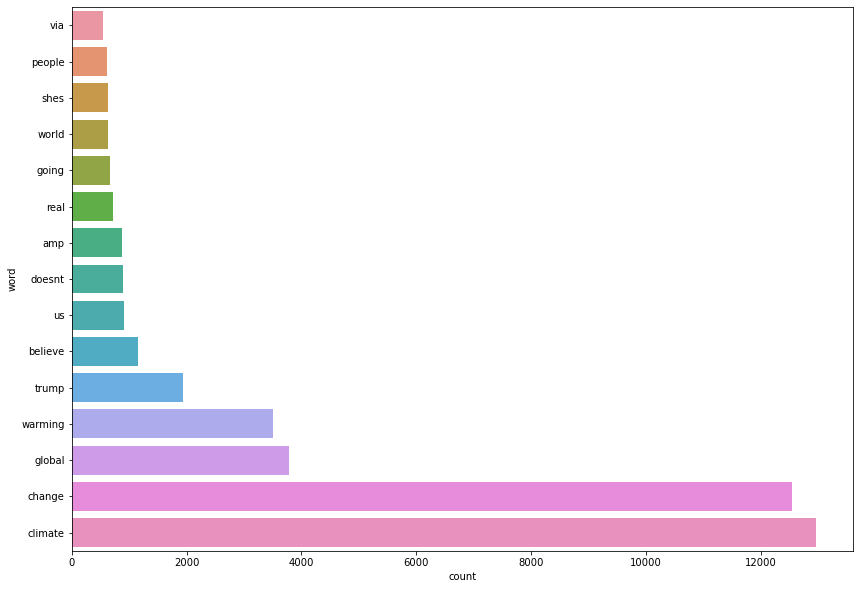

In [21]:
# A bar plot showing the top 15 words and the number of occurences for each word
plt.figure(figsize=(14,10))
sns.barplot(x='count',y='word',data=top_15)

### Writing the unique words along with the number of occurences to a text file

In [22]:
with open('word_count.txt','w') as f:
    f.write(tabulate(tweet_df, showindex=False, headers=tweet_df.columns))
f.close()

### Finding the Median of all unique words

In [23]:
s = dict() # Dictionary to store the number of unique words per tweet
for tweet in clean_twt:
    l = list(tweet.split())
    d = {}
    
    for word in l:
        if word in d:
            d[word]+=1
        else:
            d[word]=1
    
    s[tweet] = len(d)
    

In [24]:
# Sorting the tweets by number of unique words 
s = dict(sorted(s.items(),key = lambda x : x[1]))

In [25]:
# Storing the dictionary into a Data Frame
unique_words_per_tweet = pd.DataFrame(list(s.items()),columns=['Tweets','Unique Words'])

In [26]:
unique_words_per_tweet

,Tweets,Unique Words
0,,0
1,climate,1
2,http,1
3,beforetheflood,1
4,https,1
...,...,...
14343,america will not be great again amp our eah is...,27
14344,45 we are going to fix it no tell but meal on ...,27
14345,weve been recycling cutting meat out doing all...,27
14346,sad we now live in a country where climate cha...,27


In [27]:
n = len(unique_words_per_tweet)

In [28]:
# Calculating the median
if n%2 == 0:
    m1 = unique_words_per_tweet['Unique Words'][n//2]
    m2 = unique_words_per_tweet['Unique Words'][n//2 - 1]
    m = (m1+m2)/2

else:
    m = unique_words_per_tweet['Unique Words'][n//2]

### Writing the median into a text file

In [29]:
with open('median.txt','w') as f:
    f.write('Median\n')
    f.write('-------\n')
    f.write(str(m))

f.close()